In [1]:
from hossam import load_data

In [2]:
origin=load_data('air_passengers')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab13_/air_passengers.xlsx
[desc] 어느 항공사의 월간 탑승객 수 (출처: https://www.kaggle.com/datasets/rakannimer/air-passengers)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (144, 2)
행 개수 : 144개
열 개수 : 2개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None


,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
# 패키지 참조
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# 그래프 초기화
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

# 데이터 입력
time_name='Month'                    # 시간 데이터 입력
yname='Passengers'                        # 변수 데이터 입력
df=origin.set_index(time_name)

# 차분을 통한 데이터 정상성 확보
diff_df=df.copy()
count=0
while True:
    ar=adfuller(diff_df[yname])
    if ar[1]<=0.05:
        width_px=1280
        height_px=760
        rows=1
        cols=1
        figsize=(width_px/my_dpi, height_px/my_dpi)
        fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
        sb.lineplot(data=diff_df, x=diff_df.index, y='Passengers')
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        plt.close()

        ar_dict={
            '검정통계량(ADF Statistic)':ar[0],
            '유의수준(p-value)':ar[1],
            '최적차수(num of lags)':ar[2],
            '관측치 개수(num of observations)':ar[3],
            '정상성':True
        }
        adf=DataFrame([ar_dict]).T
        adf=adf.rename(columns={0:f'{count}회 차분 결과'})
        display(adf)
        break
    diff_df=diff_df.diff().dropna()
    count+=1

In [ ]:
print('='*50)
print('✅ 원본 데이터 평균이동법')
print('='*50)

my_df=df.copy()
my_df['rolling3']=my_df['Passengers'].rolling(3).mean()
my_df['rolling6']=my_df['Passengers'].rolling(6).mean()
my_df['rolling9']=my_df['Passengers'].rolling(9).mean()

width_px=2000
height_px=1000
rows=2
cols=2
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

sb.lineplot(data=my_df, x=my_df.index, y='Passengers', ax=ax[0][0])
sb.lineplot(data=my_df, x=my_df.index, y='rolling3', ax=ax[0][1])
sb.lineplot(data=my_df, x=my_df.index, y='rolling6', ax=ax[1][0])
sb.lineplot(data=my_df, x=my_df.index, y='rolling9', ax=ax[1][1])

ax[0][0].set_title('원본 시계열 그래프', color="#E91919")
ax[0][1].set_title('3개월 단위 시계열 그래프', color="#E91919")
ax[1][0].set_title('6개월 단위 시계열 그래프', color="#E91919")
ax[1][1].set_title('9개월 단위 시계열 그래프', color="#E91919")

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
print('='*50)
print('✅ 차분된 데이터 평균이동법')
print('='*50)

me_df=diff_df.copy()
me_df['rolling3']=me_df['Passengers'].rolling(3).mean()
me_df['rolling6']=me_df['Passengers'].rolling(6).mean()
me_df['rolling9']=me_df['Passengers'].rolling(9).mean()

width_px=2000
height_px=1000
rows=2
cols=2
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

sb.lineplot(data=me_df, x=me_df.index, y='Passengers', ax=ax[0][0])
sb.lineplot(data=me_df, x=me_df.index, y='rolling3', ax=ax[0][1])
sb.lineplot(data=me_df, x=me_df.index, y='rolling6', ax=ax[1][0])
sb.lineplot(data=me_df, x=me_df.index, y='rolling9', ax=ax[1][1])

ax[0][0].set_title('차분 데이터 시계열 그래프', color="#E91919")
ax[0][1].set_title('3개월 단위 차분 데이터 시계열 그래프', color="#E91919")
ax[1][0].set_title('6개월 단위 차분 데이터 시계열 그래프', color="#E91919")
ax[1][1].set_title('9개월 단위 차분 데이터 시계열 그래프', color="#E91919")

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
print('='*50)
print('✅ 원본 데이터 지수평활법')
print('='*50)

my_df['ewm3']=my_df['Passengers'].ewm(3).mean()
my_df['ewm6']=my_df['Passengers'].ewm(6).mean()
my_df['ewm9']=my_df['Passengers'].ewm(9).mean()

width_px=2000
height_px=1000
rows=2
cols=2
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

sb.lineplot(data=my_df, x=my_df.index, y='Passengers', ax=ax[0][0])
sb.lineplot(data=my_df, x=my_df.index, y='ewm3', ax=ax[0][1])
sb.lineplot(data=my_df, x=my_df.index, y='ewm6', ax=ax[1][0])
sb.lineplot(data=my_df, x=my_df.index, y='ewm9', ax=ax[1][1])

ax[0][0].set_title('원본 시계열 그래프', color="#E91919")
ax[0][1].set_title('3개월 단위 시계열 그래프', color="#E91919")
ax[1][0].set_title('6개월 단위 시계열 그래프', color="#E91919")
ax[1][1].set_title('9개월 단위 시계열 그래프', color="#E91919")

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
print('='*50)
print('✅ 차분된 데이터 지수평활법')
print('='*50)

me_df=diff_df.copy()
me_df['ewm3']=me_df['Passengers'].ewm(3).mean()
me_df['ewm6']=me_df['Passengers'].ewm(6).mean()
me_df['ewm9']=me_df['Passengers'].ewm(9).mean()

width_px=2000
height_px=1000
rows=2
cols=2
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

sb.lineplot(data=me_df, x=me_df.index, y='Passengers', ax=ax[0][0])
sb.lineplot(data=me_df, x=me_df.index, y='ewm3', ax=ax[0][1])
sb.lineplot(data=me_df, x=me_df.index, y='ewm6', ax=ax[1][0])
sb.lineplot(data=me_df, x=me_df.index, y='ewm9', ax=ax[1][1])

ax[0][0].set_title('차분 데이터 시계열 그래프', color="#E91919")
ax[0][1].set_title('3개월 단위 차분 데이터 시계열 그래프', color="#E91919")
ax[1][0].set_title('6개월 단위 차분 데이터 시계열 그래프', color="#E91919")
ax[1][1].set_title('9개월 단위 차분 데이터 시계열 그래프', color="#E91919")

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
print('='*50)
print('✅ 분해 시계열')
print('='*50)

# model_name='additive'                   # 가법 모델
model_name='multiplicative'             # 승법 모델
sd=seasonal_decompose(df['Passengers'], model=model_name)

sd_df=DataFrame({
    'original':sd.observed,
    'trend':sd.trend,
    'seasonal':sd.seasonal,
    'resid':sd.resid
}, index=origin.index)

figure=sd.plot()
figure.set_size_inches((15,20))

fig, ax1, ax2, ax3, ax4=figure.get_children()

ax1.set_ylabel('Original')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

plt.show()
plt.close()

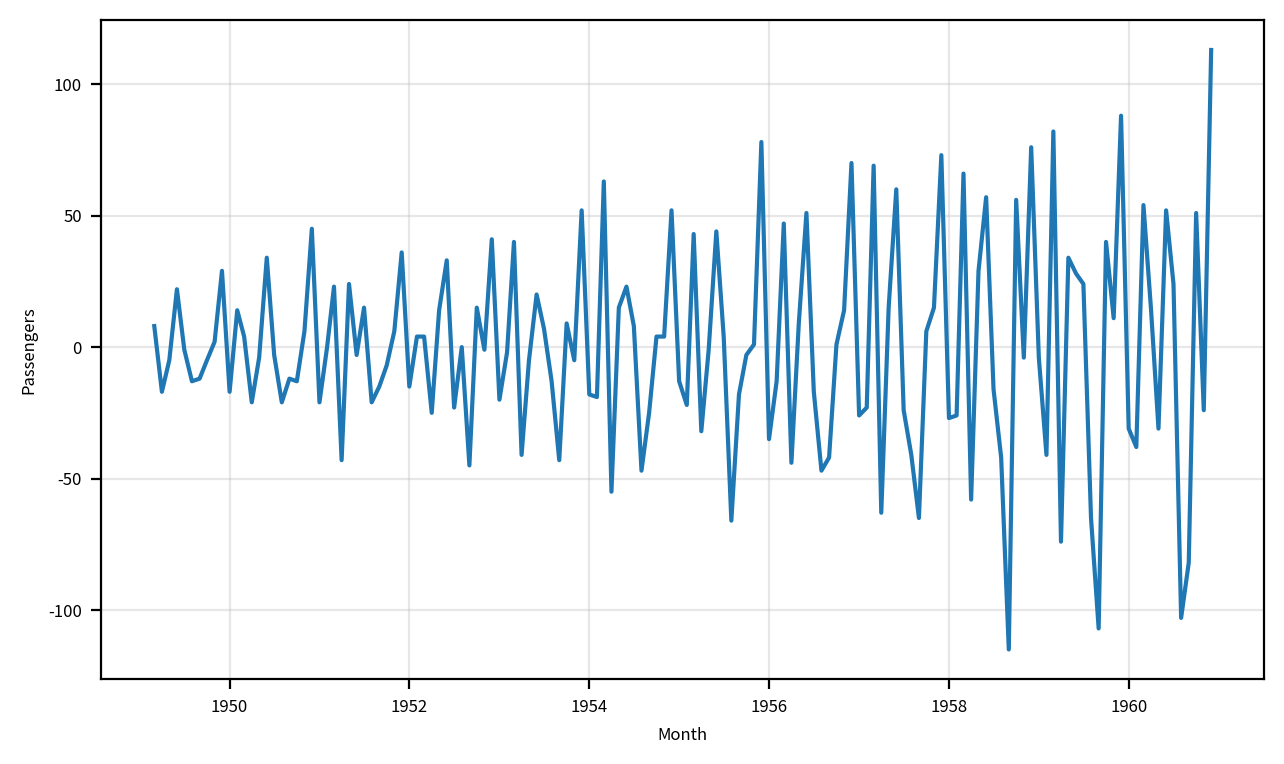

,2회 차분 결과
검정통계량(ADF Statistic),-16.384232
유의수준(p-value),0.0
최적차수(num of lags),11
관측치 개수(num of observations),130
정상성,True


✅ 원본 데이터 평균이동법


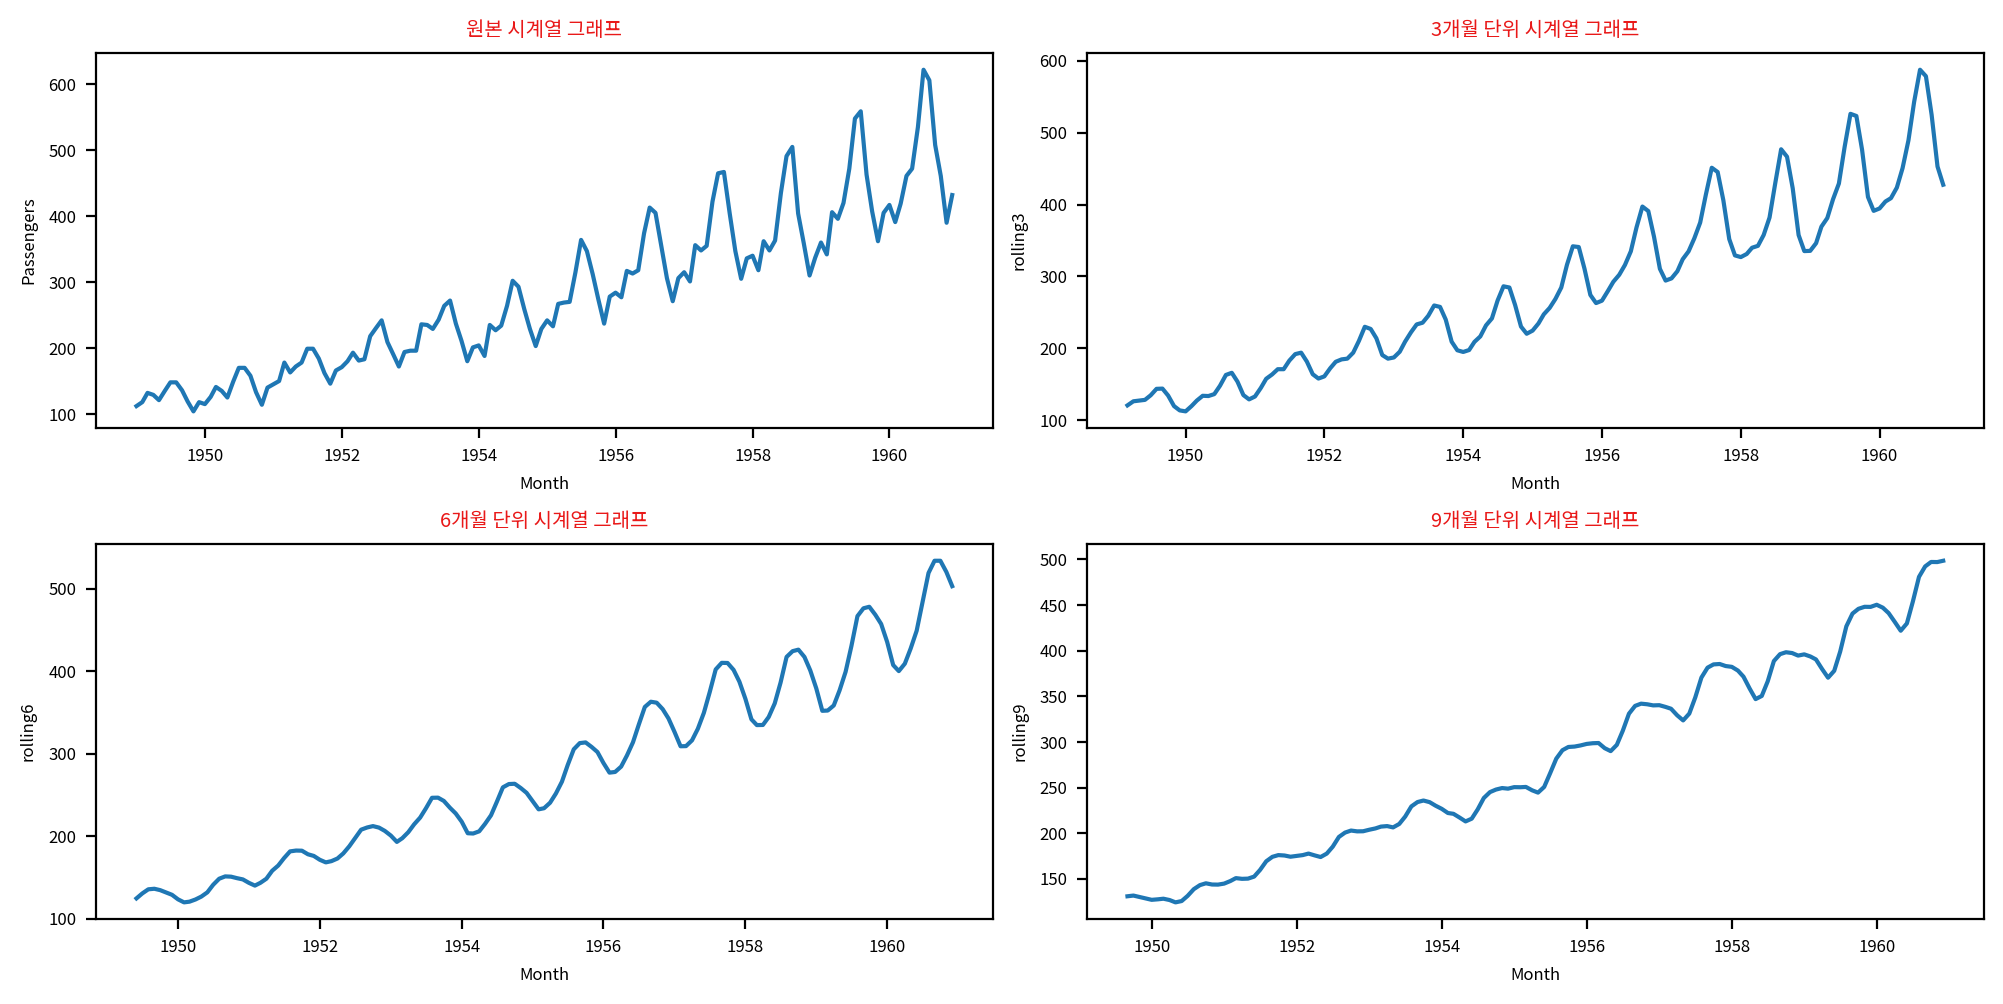

✅ 차분된 데이터 평균이동법


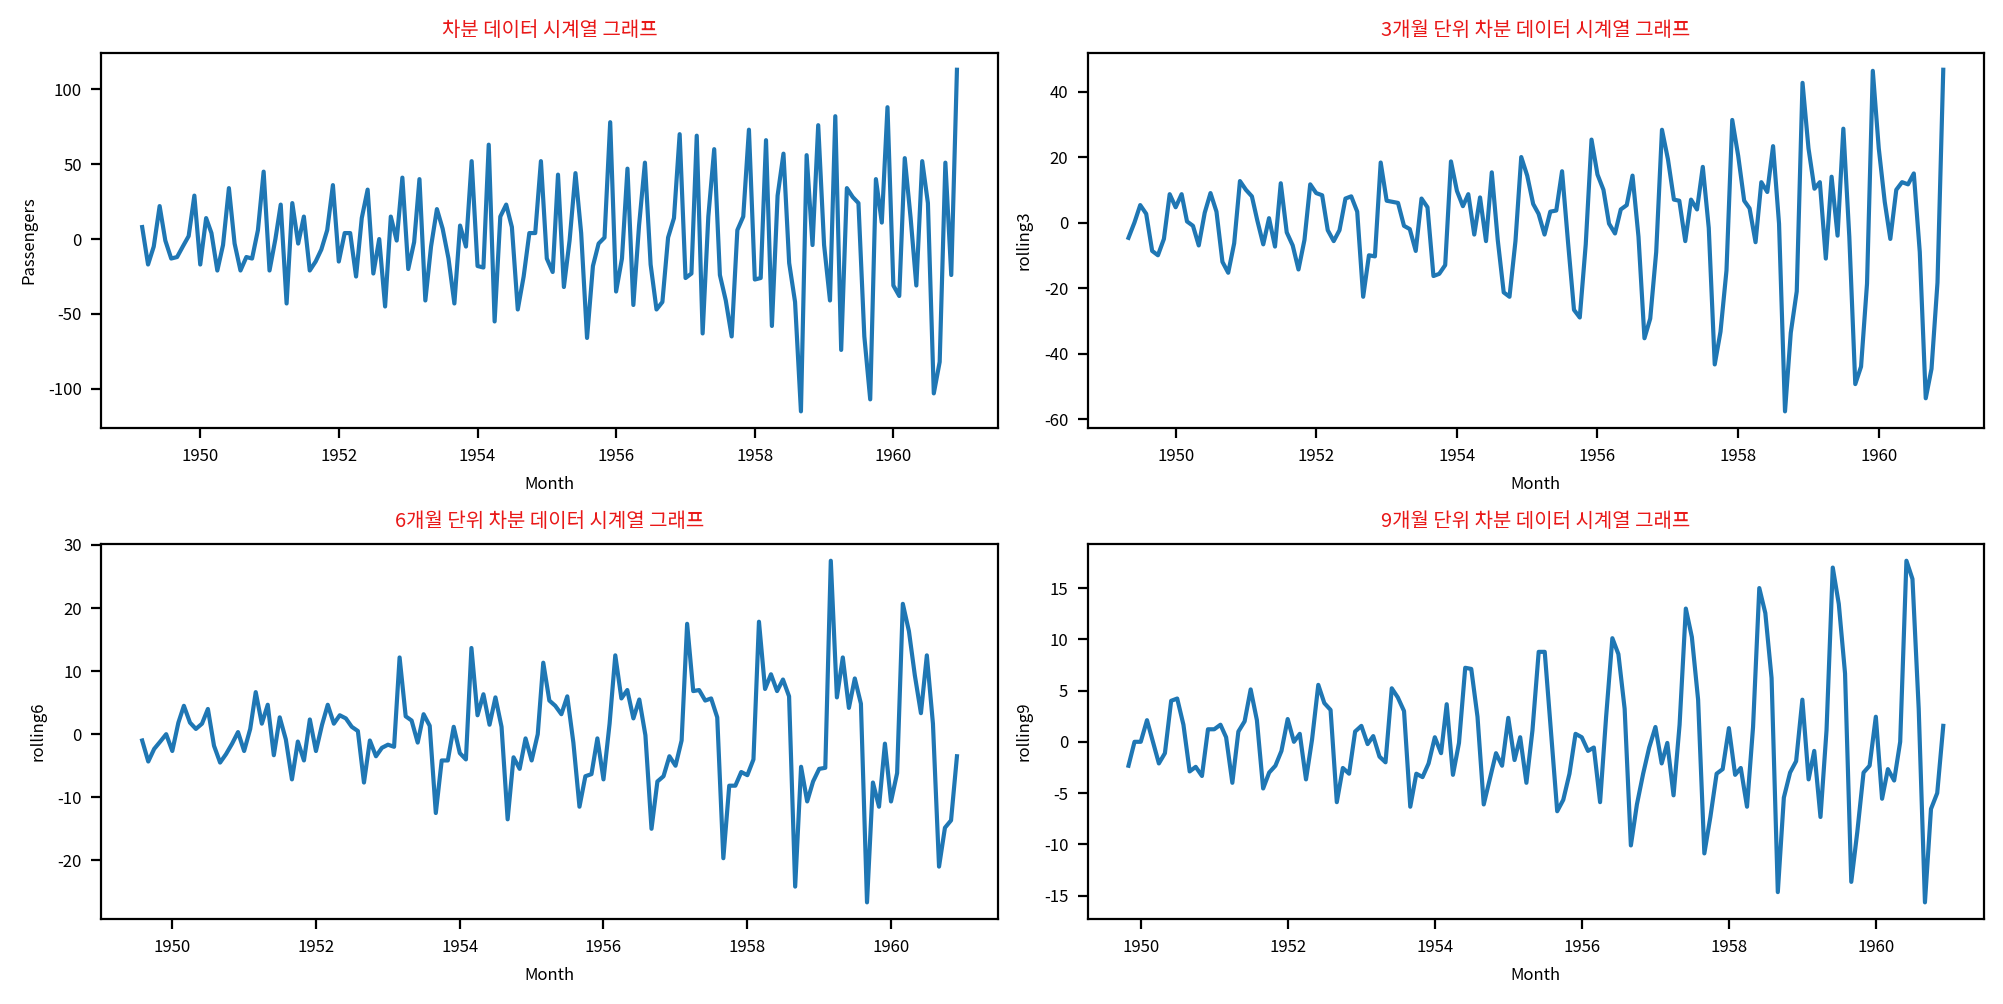

✅ 원본 데이터 지수평활법


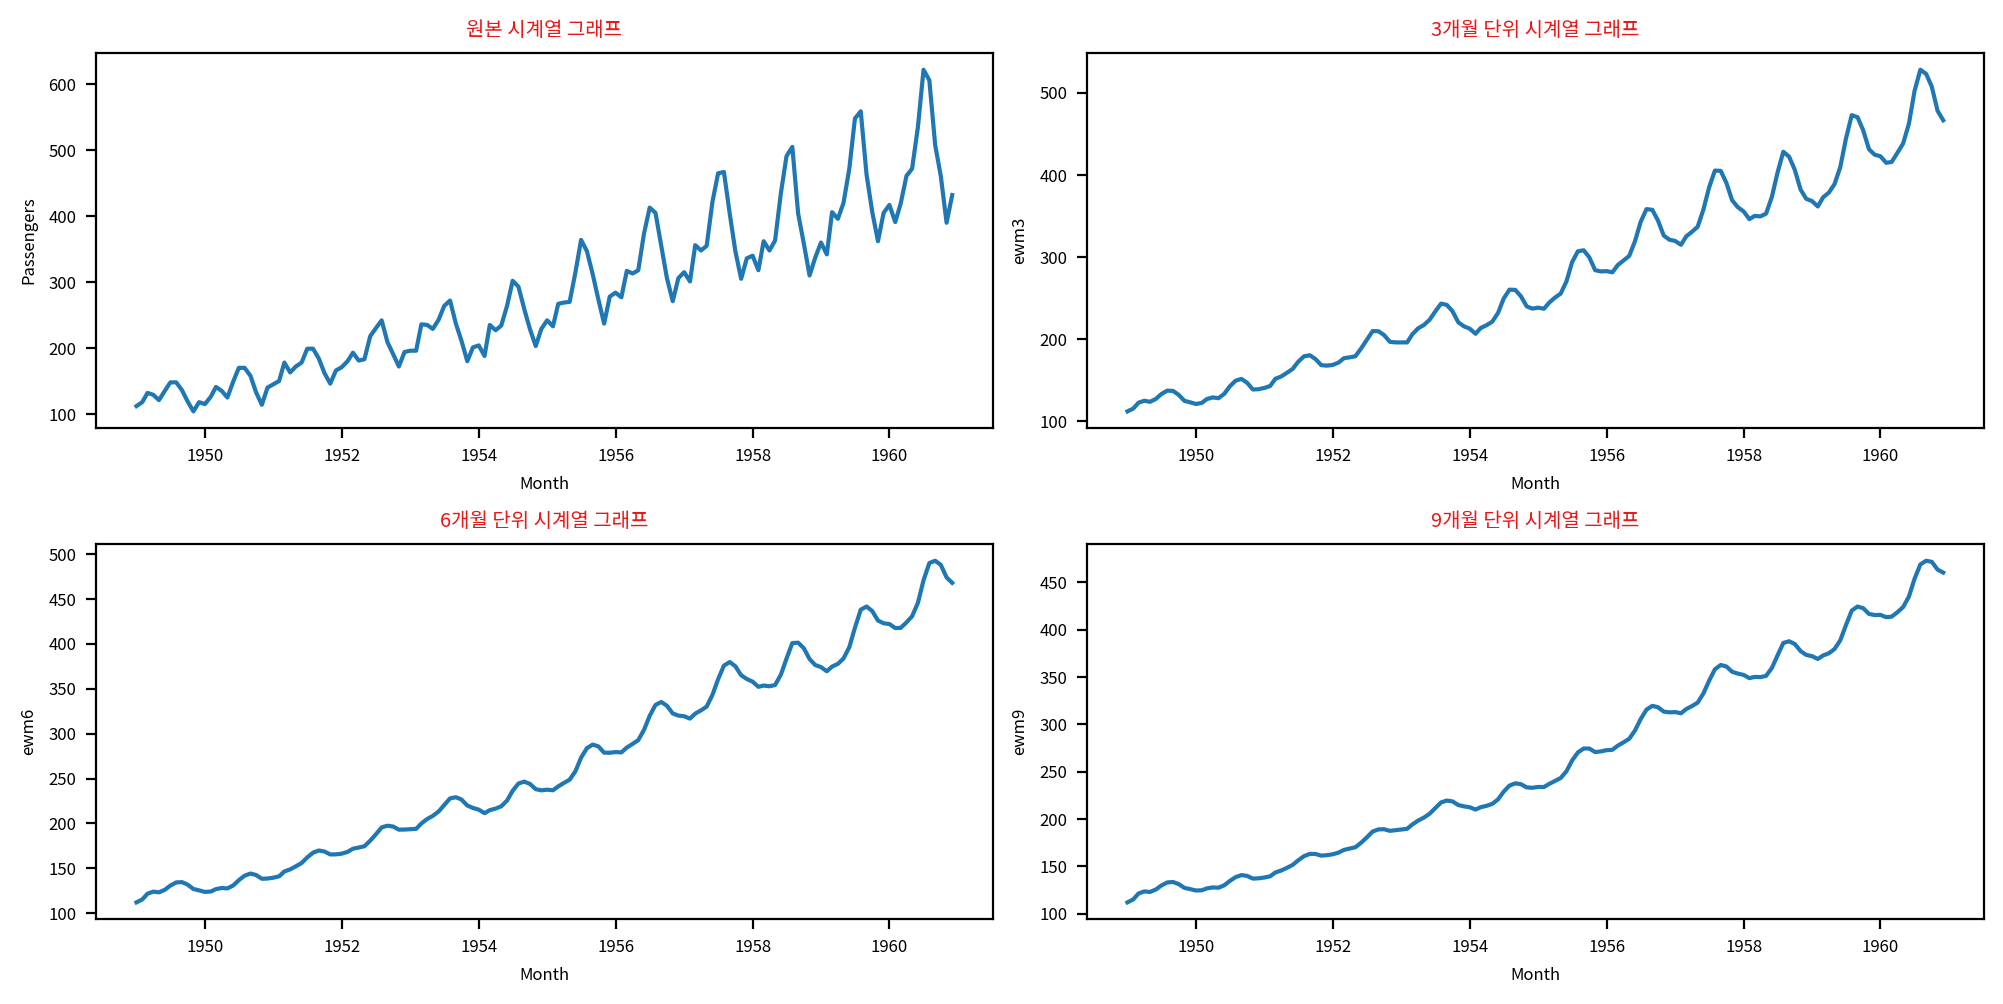

✅ 차분된 데이터 지수평활법


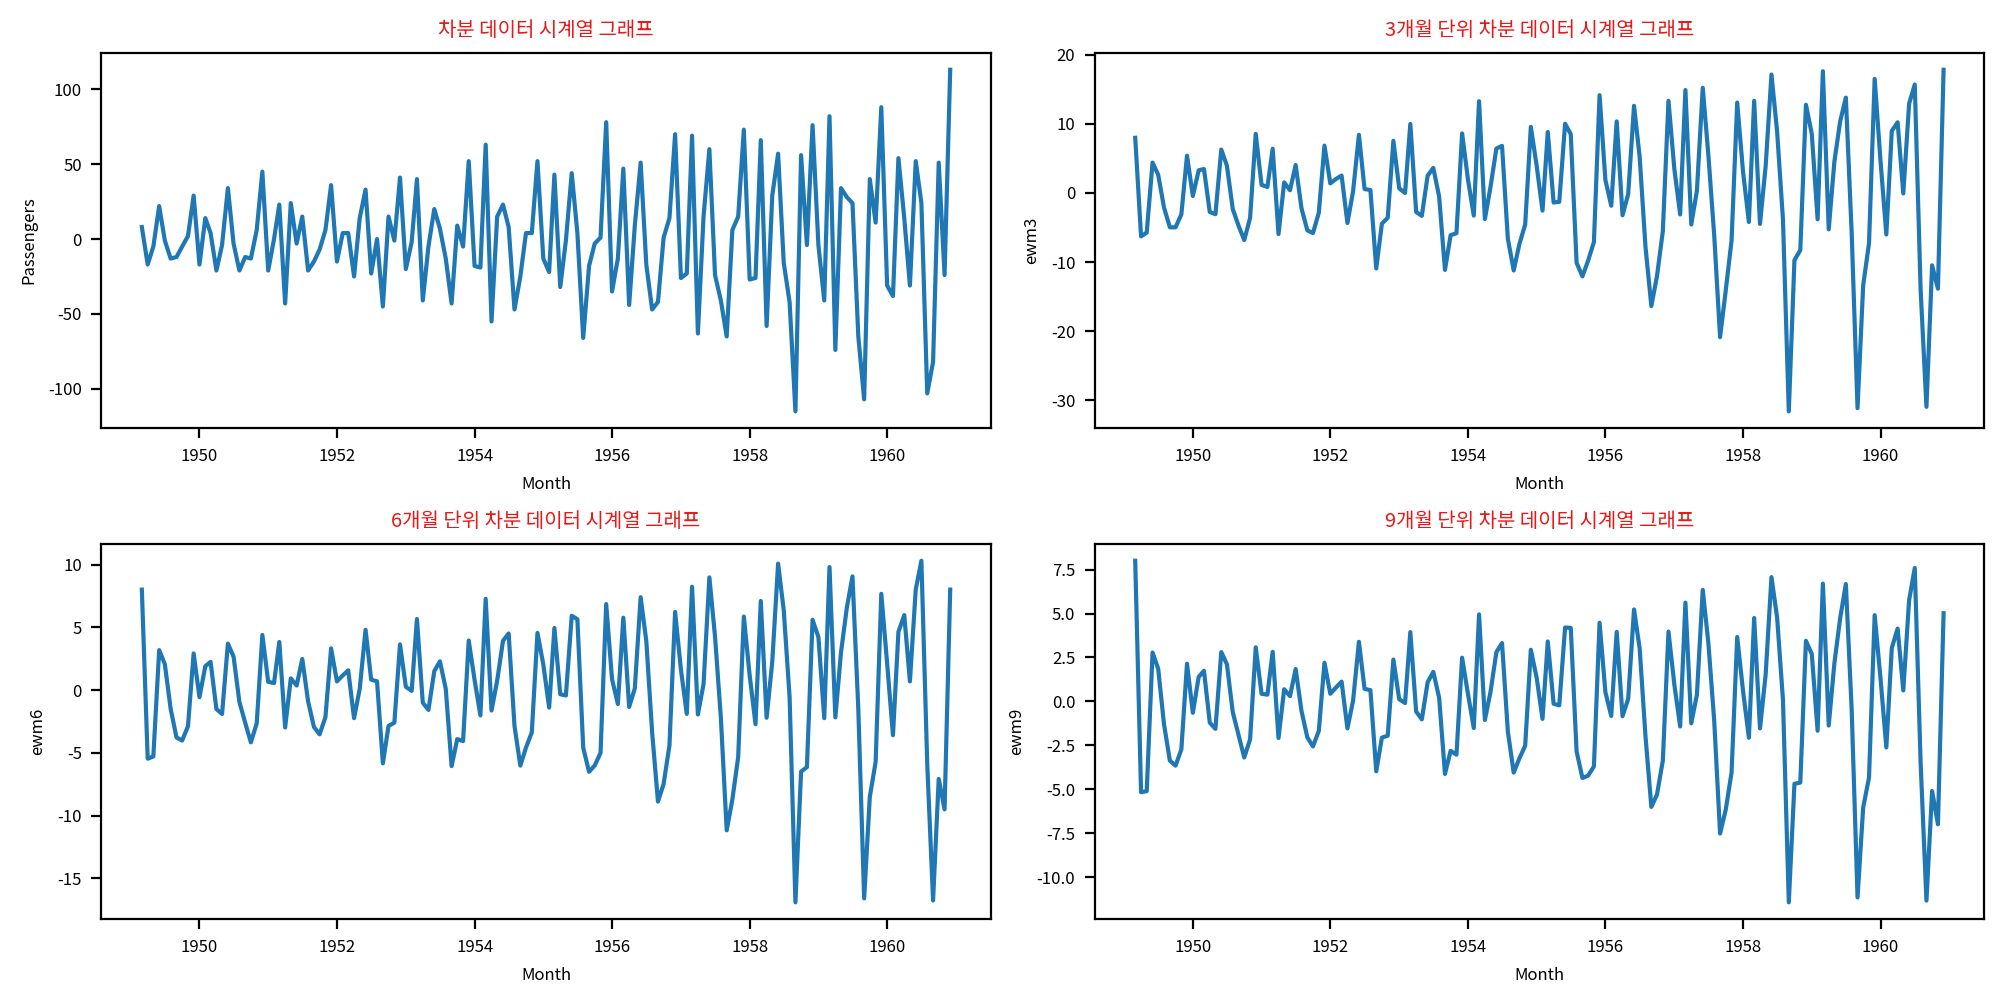

✅ 분해 시계열


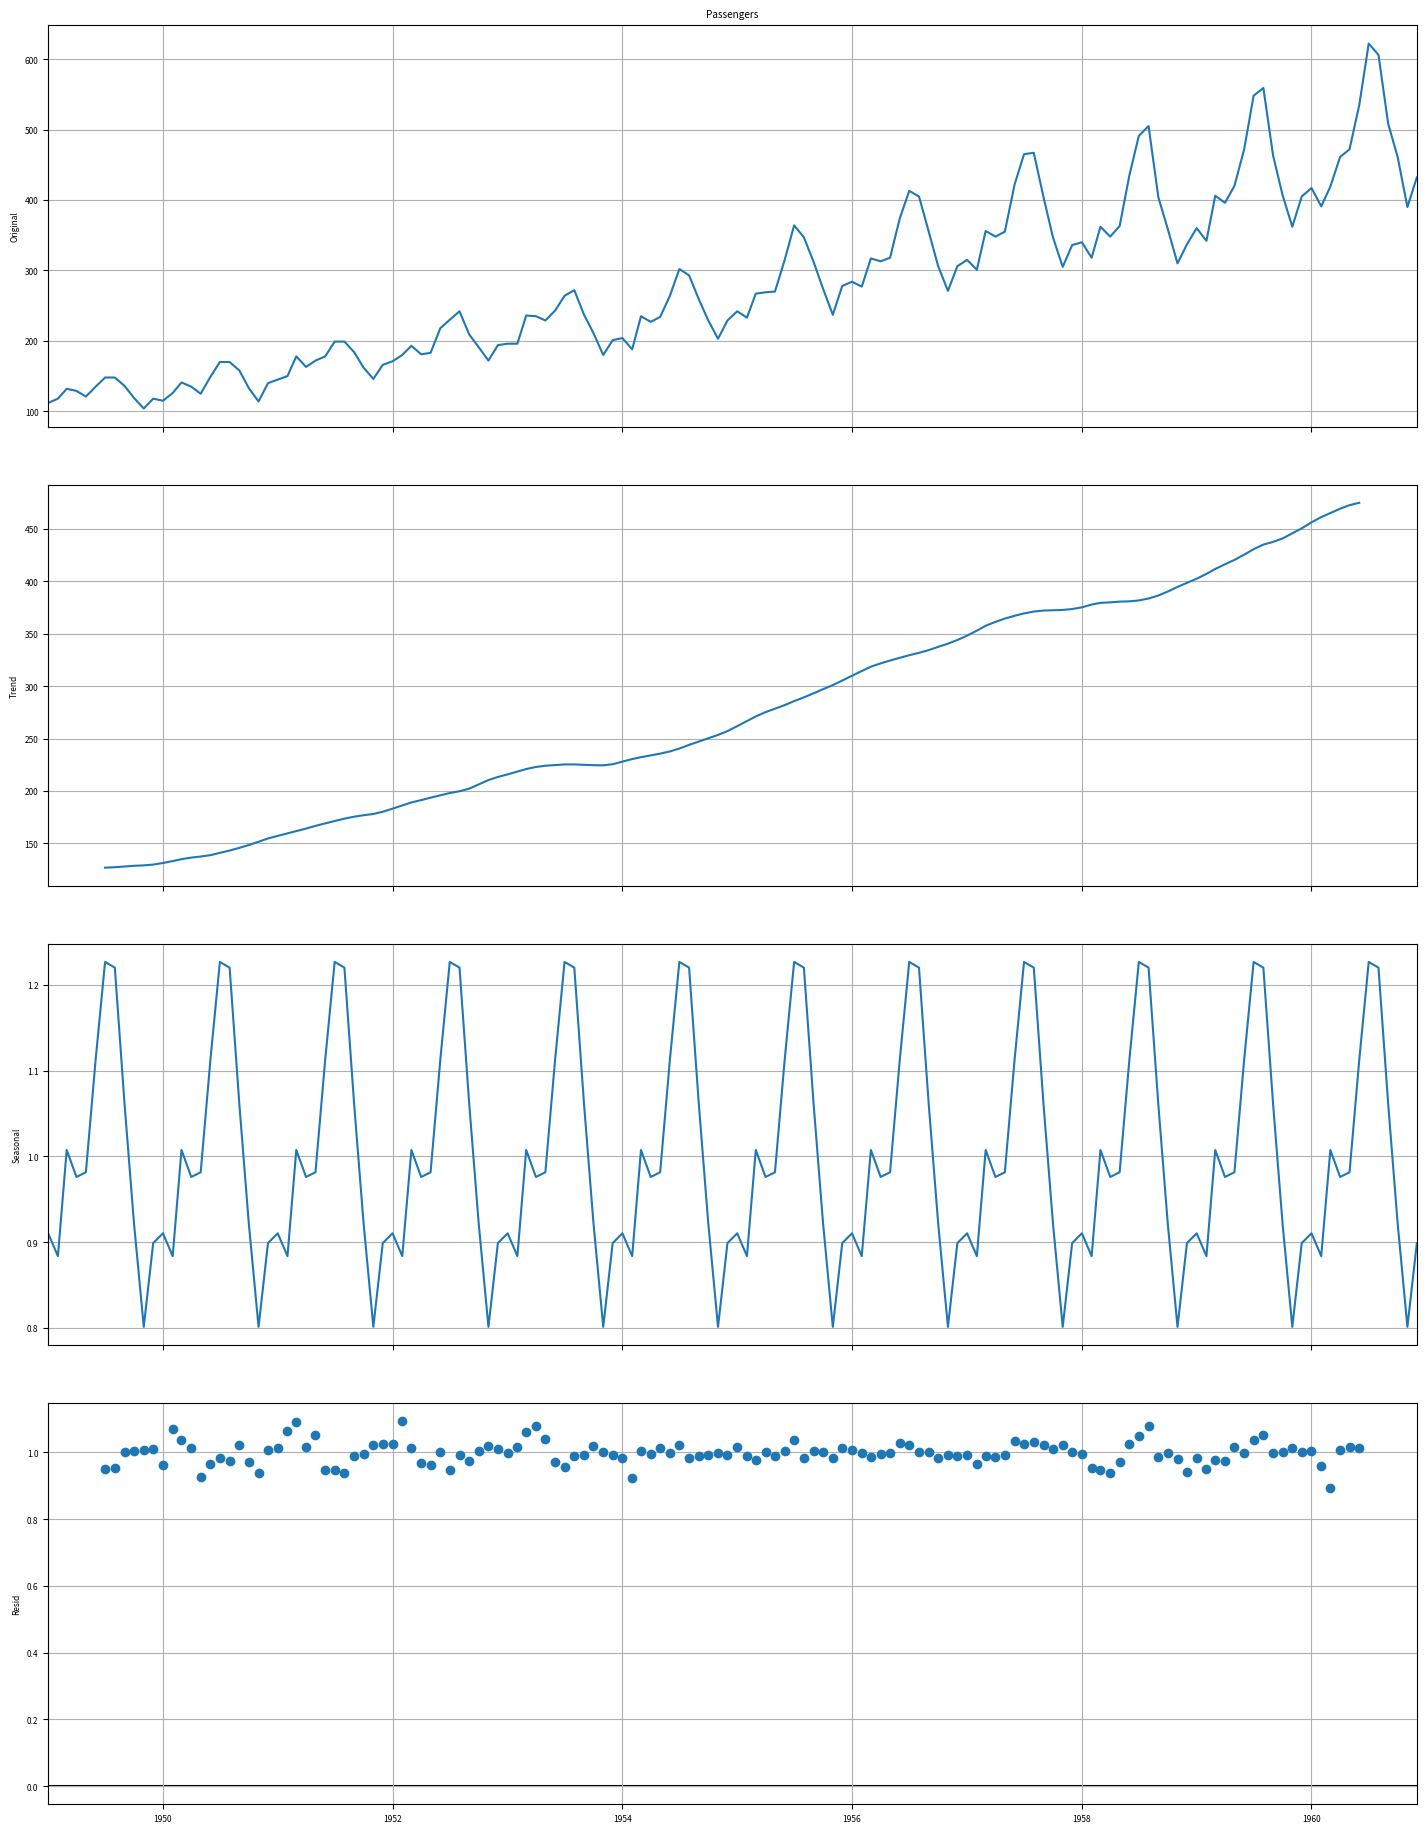

In [3]:
# 데이터 입력
time_name='Month'                    # 시간 데이터 입력
yname='Passengers'                        # 변수 데이터 입력

# 패키지 참조
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# 그래프 초기화
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

# 차분을 통한 데이터 정상성 확보
df=origin.set_index(time_name)
diff_df=df.copy()
count=0
while True:
    ar=adfuller(diff_df[yname])
    if ar[1]<=0.05:
        width_px=1280
        height_px=760
        rows=1
        cols=1
        figsize=(width_px/my_dpi, height_px/my_dpi)
        fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
        sb.lineplot(data=diff_df, x=diff_df.index, y='Passengers')
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        plt.close()

        ar_dict={
            '검정통계량(ADF Statistic)':ar[0],
            '유의수준(p-value)':ar[1],
            '최적차수(num of lags)':ar[2],
            '관측치 개수(num of observations)':ar[3],
            '정상성':True
        }
        adf=DataFrame([ar_dict]).T
        adf=adf.rename(columns={0:f'{count}회 차분 결과'})
        display(adf)
        break
    diff_df=diff_df.diff().dropna()
    count+=1

# 시각화를 통한 데이터 탐색 과정
print('='*50)
print('✅ 원본 데이터 평균이동법')
print('='*50)
my_df=df.copy()
my_df['rolling3']=my_df[yname].rolling(3).mean()
my_df['rolling6']=my_df[yname].rolling(6).mean()
my_df['rolling9']=my_df[yname].rolling(9).mean()
width_px=2000
height_px=1000
rows=2
cols=2
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
sb.lineplot(data=my_df, x=my_df.index, y=yname, ax=ax[0][0])
sb.lineplot(data=my_df, x=my_df.index, y='rolling3', ax=ax[0][1])
sb.lineplot(data=my_df, x=my_df.index, y='rolling6', ax=ax[1][0])
sb.lineplot(data=my_df, x=my_df.index, y='rolling9', ax=ax[1][1])
ax[0][0].set_title('원본 시계열 그래프', color="#E91919")
ax[0][1].set_title('3개월 단위 시계열 그래프', color="#E91919")
ax[1][0].set_title('6개월 단위 시계열 그래프', color="#E91919")
ax[1][1].set_title('9개월 단위 시계열 그래프', color="#E91919")
plt.tight_layout()
plt.show()
plt.close()

print('='*50)
print('✅ 차분된 데이터 평균이동법')
print('='*50)
me_df=diff_df.copy()
me_df['rolling3']=me_df[yname].rolling(3).mean()
me_df['rolling6']=me_df[yname].rolling(6).mean()
me_df['rolling9']=me_df[yname].rolling(9).mean()
width_px=2000
height_px=1000
rows=2
cols=2
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
sb.lineplot(data=me_df, x=me_df.index, y=yname, ax=ax[0][0])
sb.lineplot(data=me_df, x=me_df.index, y='rolling3', ax=ax[0][1])
sb.lineplot(data=me_df, x=me_df.index, y='rolling6', ax=ax[1][0])
sb.lineplot(data=me_df, x=me_df.index, y='rolling9', ax=ax[1][1])
ax[0][0].set_title('차분 데이터 시계열 그래프', color="#E91919")
ax[0][1].set_title('3개월 단위 차분 데이터 시계열 그래프', color="#E91919")
ax[1][0].set_title('6개월 단위 차분 데이터 시계열 그래프', color="#E91919")
ax[1][1].set_title('9개월 단위 차분 데이터 시계열 그래프', color="#E91919")
plt.tight_layout()
plt.show()
plt.close()

print('='*50)
print('✅ 원본 데이터 지수평활법')
print('='*50)
my_df['ewm3']=my_df[yname].ewm(3).mean()
my_df['ewm6']=my_df[yname].ewm(6).mean()
my_df['ewm9']=my_df[yname].ewm(9).mean()
width_px=2000
height_px=1000
rows=2
cols=2
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
sb.lineplot(data=my_df, x=my_df.index, y=yname, ax=ax[0][0])
sb.lineplot(data=my_df, x=my_df.index, y='ewm3', ax=ax[0][1])
sb.lineplot(data=my_df, x=my_df.index, y='ewm6', ax=ax[1][0])
sb.lineplot(data=my_df, x=my_df.index, y='ewm9', ax=ax[1][1])
ax[0][0].set_title('원본 시계열 그래프', color="#E91919")
ax[0][1].set_title('3개월 단위 시계열 그래프', color="#E91919")
ax[1][0].set_title('6개월 단위 시계열 그래프', color="#E91919")
ax[1][1].set_title('9개월 단위 시계열 그래프', color="#E91919")
plt.tight_layout()
plt.show()
plt.close()

print('='*50)
print('✅ 차분된 데이터 지수평활법')
print('='*50)
me_df=diff_df.copy()
me_df['ewm3']=me_df[yname].ewm(3).mean()
me_df['ewm6']=me_df[yname].ewm(6).mean()
me_df['ewm9']=me_df[yname].ewm(9).mean()
width_px=2000
height_px=1000
rows=2
cols=2
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
sb.lineplot(data=me_df, x=me_df.index, y=yname, ax=ax[0][0])
sb.lineplot(data=me_df, x=me_df.index, y='ewm3', ax=ax[0][1])
sb.lineplot(data=me_df, x=me_df.index, y='ewm6', ax=ax[1][0])
sb.lineplot(data=me_df, x=me_df.index, y='ewm9', ax=ax[1][1])
ax[0][0].set_title('차분 데이터 시계열 그래프', color="#E91919")
ax[0][1].set_title('3개월 단위 차분 데이터 시계열 그래프', color="#E91919")
ax[1][0].set_title('6개월 단위 차분 데이터 시계열 그래프', color="#E91919")
ax[1][1].set_title('9개월 단위 차분 데이터 시계열 그래프', color="#E91919")
plt.tight_layout()
plt.show()
plt.close()

print('='*50)
print('✅ 분해 시계열')
print('='*50)
# model_name='additive'                   # 가법 모델
model_name='multiplicative'             # 승법 모델
sd=seasonal_decompose(df[yname], model=model_name)
sd_df=DataFrame({
    'original':sd.observed,
    'trend':sd.trend,
    'seasonal':sd.seasonal,
    'resid':sd.resid
}, index=origin.index)
figure=sd.plot()
figure.set_size_inches((15,20))
fig, ax1, ax2, ax3, ax4=figure.get_children()
ax1.set_ylabel('Original')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
plt.show()
plt.close()